In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_squared_error
import math

## MARKETING VS VENTAS

R² (train): 0.54
R² (test): 0.88
MSE (test): 616.66, Desvío: 24.83

 Valores Reales vs Predichos 

    y_test      y_pred
10   260.0  266.174636
9    250.0  254.911642
0    100.0  142.281705


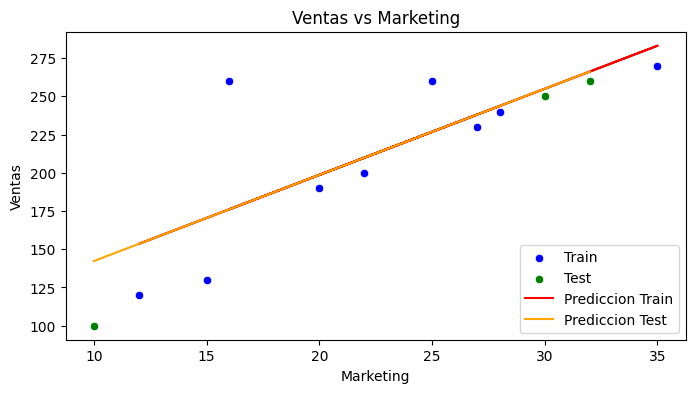

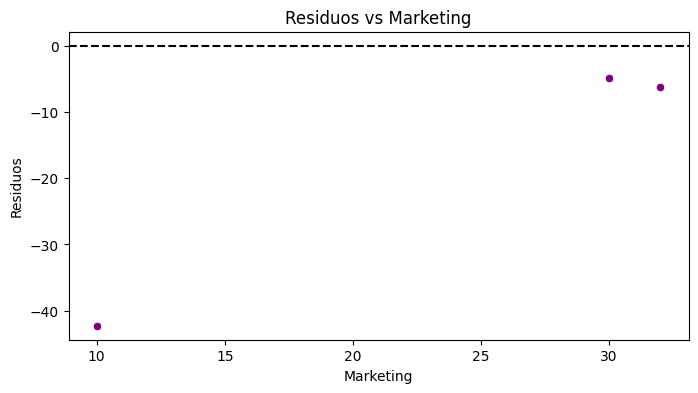

In [24]:
# Cargar datos
df = pd.read_csv('ventas.csv')

# Definir variable independiente y dependiente
X = df[['marketing']]
y = df['ventas']

# Separar en train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Escalar variable independiente
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Entrenar modelo
model = LinearRegression()
model.fit(X_train_scaled, y_train)

# Predicciones
y_pred_train = model.predict(X_train_scaled)
y_pred_test = model.predict(X_test_scaled)

# Convertir a array unidimensional
y_pred_flat = y_pred_test.flatten()
y_pred_flat_train = y_pred_train.flatten()

# DataFrames de comparación
df_compare = pd.DataFrame(index=y_test.index)
df_compare['y_test'] = y_test
df_compare['y_pred_flat'] = y_pred_flat

df_compare_test = pd.DataFrame(index=y_test.index)
df_compare_test['y_test'] = y_test

df_compare_train = pd.DataFrame(index=y_train.index)
df_compare_train['y_train'] = y_train
df_compare_train['y_pred_flat_train'] = y_pred_flat_train

# Evaluación
print(f'R² (train): {r2_score(y_train, y_pred_train):.2f}')
print(f'R² (test): {r2_score(y_test, y_pred_test):.2f}')
mse_test = mean_squared_error(y_test, y_pred_test)
print(f'MSE (test): {mse_test:.2f}, Desvío: {math.sqrt(mse_test):.2f}')

# Comparar valores reales vs predichos
df_compare = pd.DataFrame(index=y_test.index)
df_compare['y_test'] = y_test
df_compare['y_pred'] = y_pred_test
print('\n Valores Reales vs Predichos \n')
print(df_compare)

# Visualización
plt.figure(figsize=(8, 4))
sns.scatterplot(x=X_train['marketing'], y=y_train, color='blue', label='Train')
sns.scatterplot(x=X_test['marketing'], y=y_test, color='green', label='Test')
plt.plot(X_train, y_pred_train, color='red', label='Prediccion Train')
plt.plot(X_test, y_pred_test, color='orange', label='Prediccion Test')
plt.title('Ventas vs Marketing')
plt.xlabel('Marketing')
plt.ylabel('Ventas')
plt.legend()
plt.show()

# Residuos
residuos = y_test - y_pred_test
plt.figure(figsize=(8, 4))
sns.scatterplot(x=X_test['marketing'], y=residuos, color='purple')
plt.axhline(0, color='black', linestyle='--')
plt.title('Residuos vs Marketing')
plt.xlabel('Marketing')
plt.ylabel('Residuos')
plt.show()


## DESCUENTOS VS VENTAS

R² (train): 0.73
R² (test): 0.99
MSE (test): 46.36, Desvío: 6.81

 Valores Reales vs Predichos 

    y_test      y_pred
10   260.0  266.257198
9    250.0  257.394434
0    100.0  106.727447


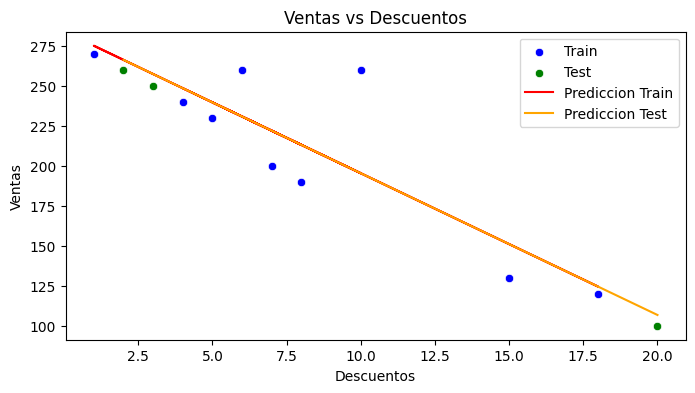

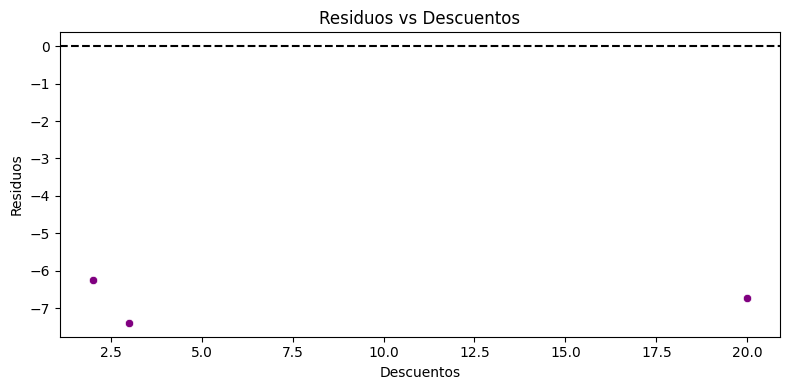

In [21]:
# Cargar datos
df = pd.read_csv('ventas.csv')

# Definir variable independiente y dependiente
X = df[['descuentos']]
y = df['ventas']

# Separar en train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Escalar variable independiente
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Entrenar modelo
model = LinearRegression()
model.fit(X_train_scaled, y_train)

# Predicciones
y_pred_train = model.predict(X_train_scaled)
y_pred_test = model.predict(X_test_scaled)

# Evaluación
print(f'R² (train): {r2_score(y_train, y_pred_train):.2f}')
print(f'R² (test): {r2_score(y_test, y_pred_test):.2f}')
mse_test = mean_squared_error(y_test, y_pred_test)
print(f'MSE (test): {mse_test:.2f}, Desvío: {math.sqrt(mse_test):.2f}')

# Comparar valores reales vs predichos
df_compare = pd.DataFrame(index=y_test.index)
df_compare['y_test'] = y_test
df_compare['y_pred'] = y_pred_test
print('\n Valores Reales vs Predichos \n')
print(df_compare)

# Visualización
plt.figure(figsize=(8, 4))
sns.scatterplot(x=X_train['descuentos'], y=y_train, color='blue', label='Train')
sns.scatterplot(x=X_test['descuentos'], y=y_test, color='green', label='Test')
plt.plot(X_train, y_pred_train, color='red', label='Prediccion Train')
plt.plot(X_test, y_pred_test, color='orange', label='Prediccion Test')
plt.title('Ventas vs Descuentos')
plt.xlabel('Descuentos')
plt.ylabel('Ventas')
plt.legend()
plt.show()

# Residuos
residuos = y_test - y_pred_test
plt.figure(figsize=(8, 4))
sns.scatterplot(x=X_test['descuentos'], y=residuos, color='purple')
plt.axhline(0, color='black', linestyle='--')
plt.title('Residuos vs Descuentos')
plt.xlabel('Descuentos')
plt.ylabel('Residuos')
plt.tight_layout()
plt.show()

## AÑO VS VENTAS

R² (train): 0.63
R² (test): 0.93
MSE (test): 354.69, Desvío: 18.83

 Valores Reales vs Predichos 

    y_test      y_pred
10   260.0  267.510870
9    250.0  255.130435
0    100.0  131.326087


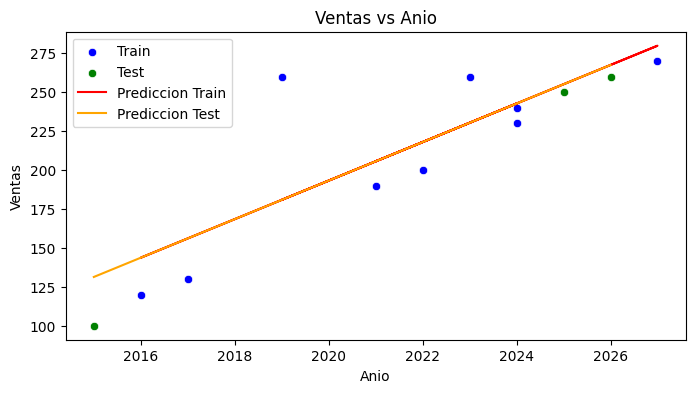

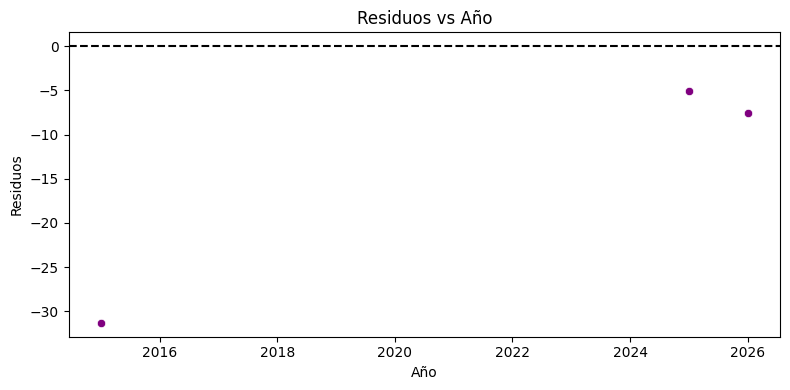

In [22]:
# Cargar datos
df = pd.read_csv('ventas.csv')

# Variable independiente y dependiente
X = df[['anio']]
y = df['ventas']

# Separar en train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Escalar año
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Entrenar modelo
model = LinearRegression()
model.fit(X_train_scaled, y_train)

# Predicciones
y_pred_train = model.predict(X_train_scaled)
y_pred_test = model.predict(X_test_scaled)

# Evaluación
print(f'R² (train): {r2_score(y_train, y_pred_train):.2f}')
print(f'R² (test): {r2_score(y_test, y_pred_test):.2f}')
mse_test = mean_squared_error(y_test, y_pred_test)
print(f'MSE (test): {mse_test:.2f}, Desvío: {math.sqrt(mse_test):.2f}')

# Comparación de valores reales vs predichos
df_compare = pd.DataFrame(index=y_test.index)
df_compare['y_test'] = y_test
df_compare['y_pred'] = y_pred_test
print('\n Valores Reales vs Predichos \n')
print(df_compare)

# Visualización
plt.figure(figsize=(8, 4))
sns.scatterplot(x=X_train['anio'], y=y_train, color='blue', label='Train')
sns.scatterplot(x=X_test['anio'], y=y_test, color='green', label='Test')
plt.plot(X_train, y_pred_train, color='red', label='Prediccion Train')
plt.plot(X_test, y_pred_test, color='orange', label='Prediccion Test')
plt.title('Ventas vs Anio')
plt.xlabel('Anio')
plt.ylabel('Ventas')
plt.legend()
plt.show()

# Residuos
residuos = y_test - y_pred_test
plt.figure(figsize=(8, 4))
sns.scatterplot(x=X_test['anio'], y=residuos, color='purple')
plt.axhline(0, color='black', linestyle='--')
plt.title('Residuos vs Año')
plt.xlabel('Año')
plt.ylabel('Residuos')
plt.tight_layout()
plt.show()

## REGION VS VENTAS

R² (train): 0.05
R² (test): -0.22
MSE (test): 6524.75, Desvío: 80.78

 Valores Reales vs Predichos 

    y_test  y_pred
10   260.0   197.5
9    250.0   222.0
0    100.0   222.0


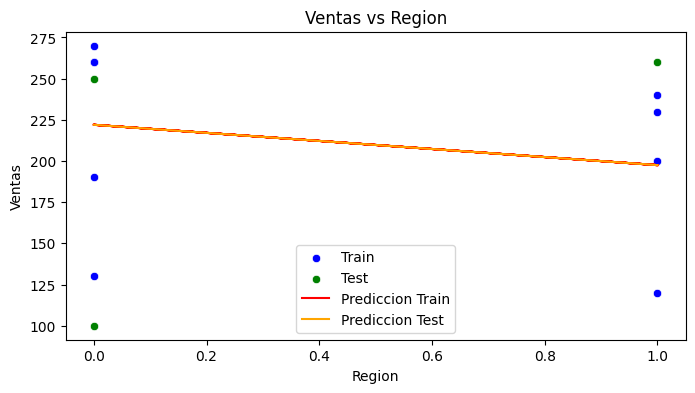

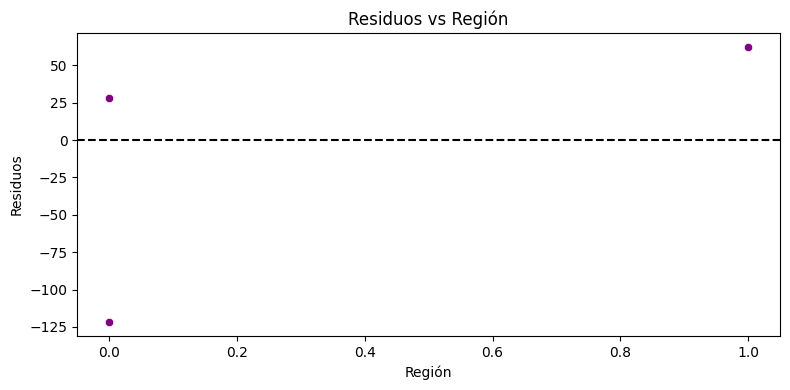

In [23]:
# Cargar datos
df = pd.read_csv('ventas.csv')

# Codificar variable categórica 'region'
df_encoded = pd.get_dummies(df, columns=['region'], prefix='region', drop_first=True)

# Variable independiente y dependiente
X = df_encoded[['region_sur']]  # 1 = sur, 0 = norte
y = df_encoded['ventas']

# Separar en train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Escalar variable binaria (opcional pero mantenido por consistencia)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Entrenar modelo
model = LinearRegression()
model.fit(X_train_scaled, y_train)

# Predicciones
y_pred_train = model.predict(X_train_scaled)
y_pred_test = model.predict(X_test_scaled)

# Evaluación
print(f'R² (train): {r2_score(y_train, y_pred_train):.2f}')
print(f'R² (test): {r2_score(y_test, y_pred_test):.2f}')
mse_test = mean_squared_error(y_test, y_pred_test)
print(f'MSE (test): {mse_test:.2f}, Desvío: {math.sqrt(mse_test):.2f}')

# Comparación de valores reales vs predichos
df_compare = pd.DataFrame(index=y_test.index)
df_compare['y_test'] = y_test
df_compare['y_pred'] = y_pred_test
print('\n Valores Reales vs Predichos \n')
print(df_compare)

# Visualización
plt.figure(figsize=(8, 4))
sns.scatterplot(x=X_train['region_sur'], y=y_train, color='blue', label='Train')
sns.scatterplot(x=X_test['region_sur'], y=y_test, color='green', label='Test')
plt.plot(X_train, y_pred_train, color='red', label='Prediccion Train')
plt.plot(X_test, y_pred_test, color='orange', label='Prediccion Test')
plt.title('Ventas vs Region')
plt.xlabel('Region')
plt.ylabel('Ventas')
plt.legend()
plt.show()

# Residuos
residuos = y_test - y_pred_test
plt.figure(figsize=(8, 4))
sns.scatterplot(x=X_test['region_sur'], y=residuos, color='purple')
plt.axhline(0, color='black', linestyle='--')
plt.title('Residuos vs Región')
plt.xlabel('Región')
plt.ylabel('Residuos')
plt.tight_layout()
plt.show()

## MARKETING VS DESCUENTOS

R² (train): 0.89
R² (test): 0.95
MSE (test): 3.70, Desvío: 1.92

 Valores Reales vs Predichos 

    y_test     y_pred
10       2   1.419958
9        3   2.811331
0       20  16.725052


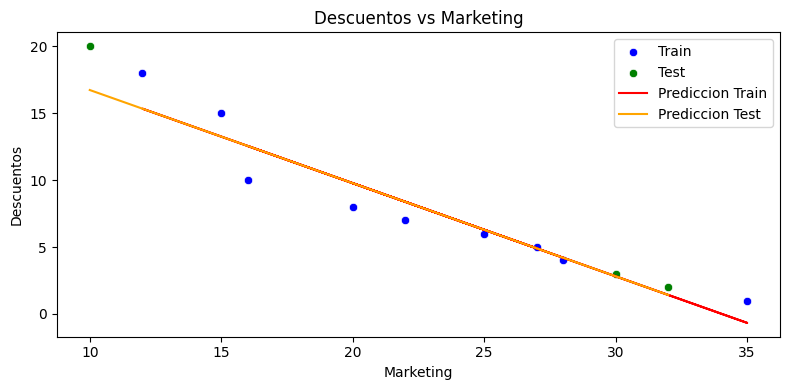

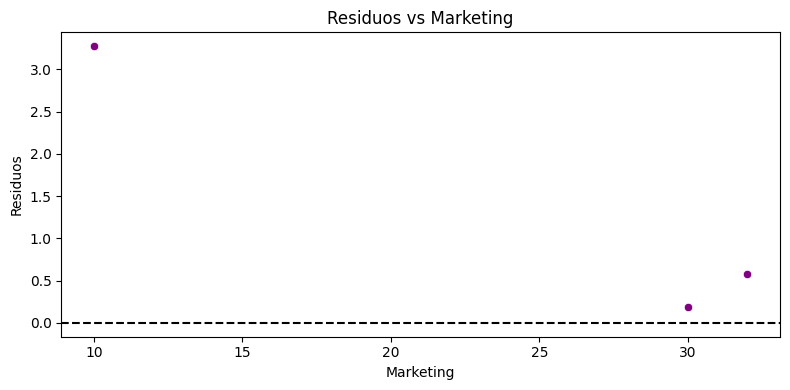

In [27]:
df = pd.read_csv('ventas.csv')

# Variable independiente y dependiente
X = df_encoded[['marketing']]
y = df_encoded['descuentos']

# Separar en train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Escalar variable numérica
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Entrenar modelo
model = LinearRegression()
model.fit(X_train_scaled, y_train)

# Predicciones
y_pred_train = model.predict(X_train_scaled)
y_pred_test = model.predict(X_test_scaled)

# Evaluación
print(f'R² (train): {r2_score(y_train, y_pred_train):.2f}')
print(f'R² (test): {r2_score(y_test, y_pred_test):.2f}')
mse_test = mean_squared_error(y_test, y_pred_test)
print(f'MSE (test): {mse_test:.2f}, Desvío: {math.sqrt(mse_test):.2f}')

# Comparación de valores reales vs predichos
df_compare = pd.DataFrame(index=y_test.index)
df_compare['y_test'] = y_test
df_compare['y_pred'] = y_pred_test
print('\n Valores Reales vs Predichos \n')
print(df_compare)

# Visualización: Descuentos vs Marketing
plt.figure(figsize=(8, 4))
sns.scatterplot(x=X_train['marketing'], y=y_train, color='blue', label='Train')
sns.scatterplot(x=X_test['marketing'], y=y_test, color='green', label='Test')
plt.plot(X_train['marketing'], y_pred_train, color='red', label='Prediccion Train')
plt.plot(X_test['marketing'], y_pred_test, color='orange', label='Prediccion Test')
plt.title('Descuentos vs Marketing')
plt.xlabel('Marketing')
plt.ylabel('Descuentos')
plt.legend()
plt.tight_layout()
plt.show()

# Gráfico de residuos
residuos = y_test - y_pred_test
plt.figure(figsize=(8, 4))
sns.scatterplot(x=X_test['marketing'], y=residuos, color='purple')
plt.axhline(0, color='black', linestyle='--')
plt.title('Residuos vs Marketing')
plt.xlabel('Marketing')
plt.ylabel('Residuos')
plt.tight_layout()
plt.show()